<a href="https://colab.research.google.com/github/Egisess/Geant4-Cyclotron-electron-accelerator/blob/main/curs_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Считываем полученные данные - в обоих случаях генерировалось $10^8$ частиц

In [2]:
kev250 = pd.read_csv('250kev 100mil.txt', sep=" ", header=None)
kev250.columns = ['trackNum', 'x', 'y', 'z', 'kinEn', 'IsFirstStepInVolume', 'particleName']
kev250.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33334 entries, 0 to 33333
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trackNum             33334 non-null  int64  
 1   x                    33334 non-null  float64
 2   y                    33334 non-null  float64
 3   z                    33334 non-null  float64
 4   kinEn                33334 non-null  float64
 5   IsFirstStepInVolume  33334 non-null  int64  
 6   particleName         33334 non-null  object 
dtypes: float64(4), int64(2), object(1)
memory usage: 1.8+ MB


In [3]:
kev300 = pd.read_csv('300kev 100mil.txt', sep=" ", header=None)
kev300.columns = ['trackNum', 'x', 'y', 'z', 'kinEn', 'IsFirstStepInVolume', 'particleName']
kev300.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50669 entries, 0 to 50668
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trackNum             50669 non-null  int64  
 1   x                    50669 non-null  float64
 2   y                    50669 non-null  float64
 3   z                    50669 non-null  float64
 4   kinEn                50668 non-null  float64
 5   IsFirstStepInVolume  50668 non-null  float64
 6   particleName         50668 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


 Переносим систему отсчёта в центр мишени, оставляем только Гамма-кванты которые сделали первый шаг в объёме детектора

In [4]:
kev250['z'] = kev250['z'] - 50
kev250 = kev250[(kev250['IsFirstStepInVolume'] == 1) & (kev250['particleName'] == 'gamma')]
kev250.count()

trackNum               15629
x                      15629
y                      15629
z                      15629
kinEn                  15629
IsFirstStepInVolume    15629
particleName           15629
dtype: int64

In [5]:
kev300['z'] = kev300['z'] - 50
kev300 = kev300[(kev300['IsFirstStepInVolume'] == 1) & (kev300['particleName'] == 'gamma')]
kev300.count()

trackNum               33617
x                      33617
y                      33617
z                      33617
kinEn                  33617
IsFirstStepInVolume    33617
particleName           33617
dtype: int64

## Поверность координат детектирования частиц

Генерируется цилиндрический слой частиц с заданной энергией падающий на мишень по нормали

250 кЭв

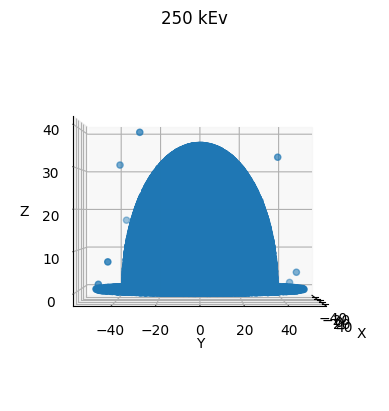

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(kev250['x'], kev250['y'], kev250['z'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("250 kEv")
ax.view_init(elev=0, azim=0, roll=0)
plt.show()

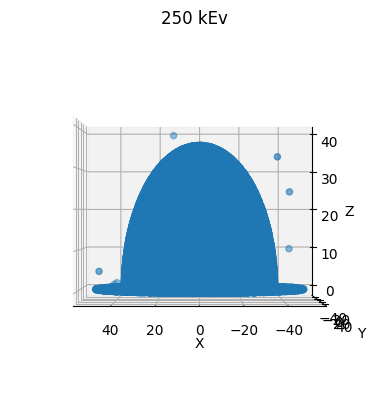

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(kev250['x'], kev250['y'], kev250['z'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("250 kEv")
ax.view_init(elev=0, azim=90, roll=0)
plt.show()

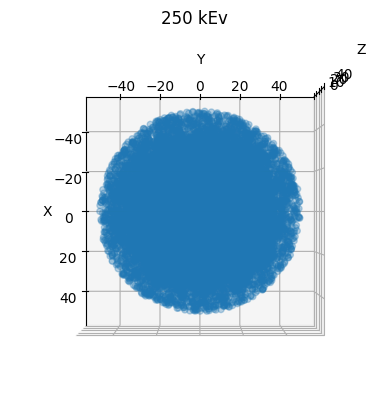

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(kev250['x'], kev250['y'], kev250['z'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("250 kEv")
ax.view_init(elev=90, azim=0, roll=0)
plt.show()

300 кЭв

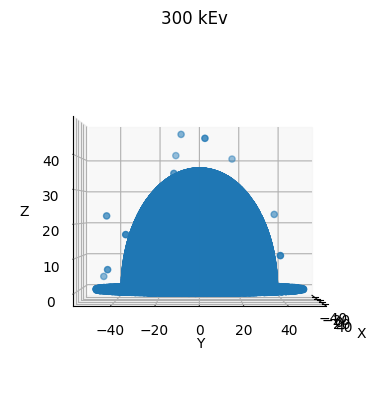

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(kev300['x'], kev300['y'], kev300['z'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("300 kEv")
ax.view_init(elev=0, azim=0, roll=0)
plt.show()

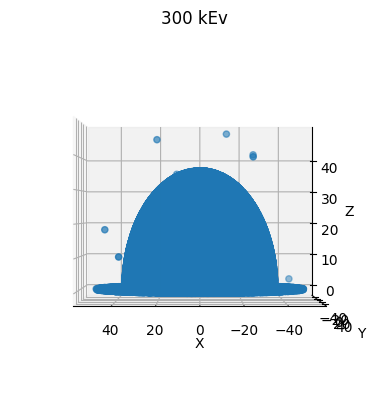

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(kev300['x'], kev300['y'], kev300['z'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("300 kEv")
ax.view_init(elev=0, azim=90, roll=0)
plt.show()

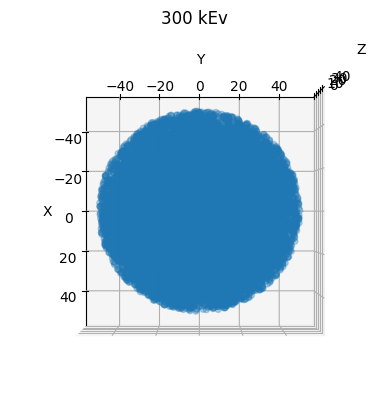

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(kev300['x'], kev300['y'], kev300['z'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("300 kEv")
ax.view_init(elev=90, azim=0, roll=0)
plt.show()

Разрежем сферу параллелепипедом вдось x = 15, x = -15, тем самым выделив частицы для исследования углового распределения по энергиям

In [12]:
kev300 = kev300[(kev300['x'] > -15) & (kev300['x'] < 15)]
kev250 = kev250[(kev250['x'] > -15) & (kev250['x'] < 15)]

Распределение энергии излучаемых частиц

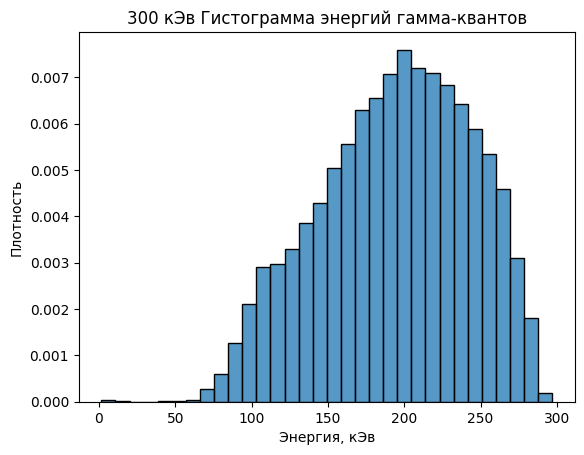

In [21]:
fig = plt.figure()
ax = fig.add_subplot()
sns.histplot(data = kev300, x = 'kinEn', bins = 32, stat = 'density')
ax.set_title("300 кЭв Гистограмма энергий гамма-квантов")
ax.set_xlabel('Энергия, кЭв')
ax.set_ylabel('Плотность')
plt.show()

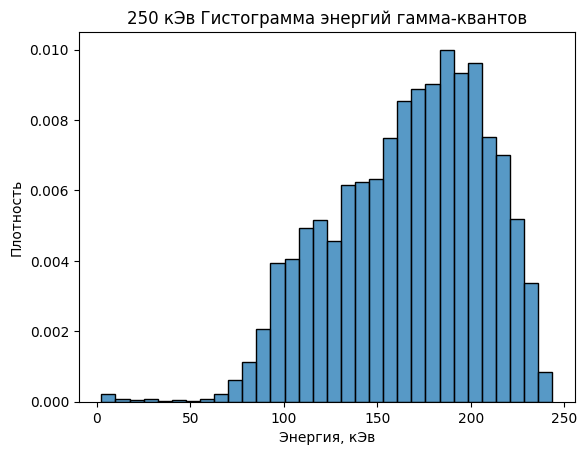

In [22]:
fig = plt.figure()
ax = fig.add_subplot()
sns.histplot(data = kev250, x = 'kinEn', bins = 32, stat = 'density')
ax.set_title("250 кЭв Гистограмма энергий гамма-квантов")
ax.set_xlabel('Энергия, кЭв')
ax.set_ylabel('Плотность')
plt.show()

Построим относительную диаграмму направленности

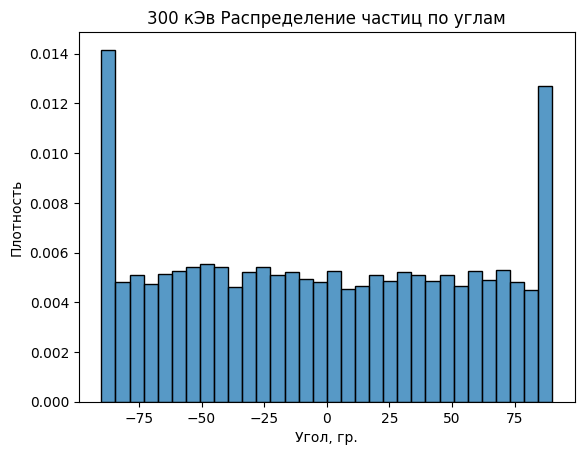

In [23]:
theta = np.arctan(kev300['y'] / kev300['z']) * 180 / np.pi
fig = plt.figure()
ax = fig.add_subplot()
sns.histplot(x = theta, bins = 32, stat = 'density')
ax.set_title("300 кЭв Распределение частиц по углам")
ax.set_xlabel('Угол, гр.')
ax.set_ylabel('Плотность')
plt.show()

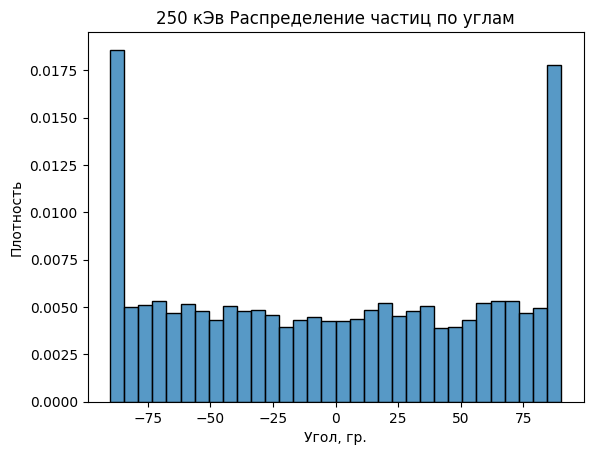

In [24]:
theta = np.arctan(kev250['y'] / kev250['z']) * 180 / np.pi
fig = plt.figure()
ax = fig.add_subplot()
sns.histplot(x = theta, bins = 32, stat = 'density')
ax.set_title("250 кЭв Распределение частиц по углам")
ax.set_xlabel('Угол, гр.')
ax.set_ylabel('Плотность')
plt.show()

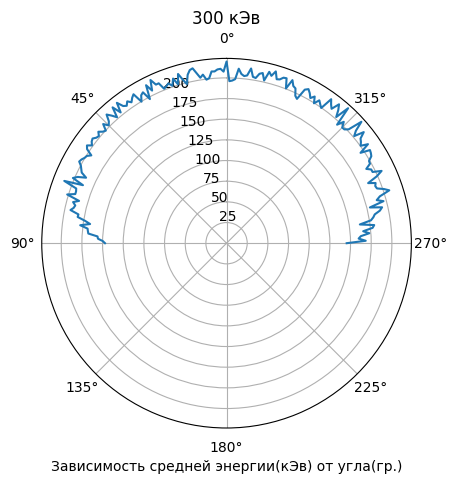

In [17]:
kev300_ang = kev300.copy()
kev300_ang['theta'] = np.round(np.arctan(kev300_ang['y'] / kev300_ang['z']) * 180 / np.pi, 0)
kev300_ang = kev300_ang.drop('x', axis=1)
kev300_ang = kev300_ang.drop('y', axis=1)
kev300_ang = kev300_ang.drop('z', axis=1)
kev300_ang = kev300_ang.drop('trackNum', axis=1)
kev300_ang = kev300_ang.drop('particleName', axis=1)
kev300_ang = kev300_ang.drop('IsFirstStepInVolume', axis=1)
kev300_ang = kev300_ang.groupby(by = 'theta').mean()
kev300_ang = kev300_ang.reset_index()

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.plot(kev300_ang['theta'] * np.pi / 180, kev300_ang['kinEn'])
ax.set_xlabel('Зависимость средней энергии(кЭв) от угла(гр.)')
ax.set_title("300 кЭв")
ax.set_theta_zero_location('W', offset=-90)
plt.show()

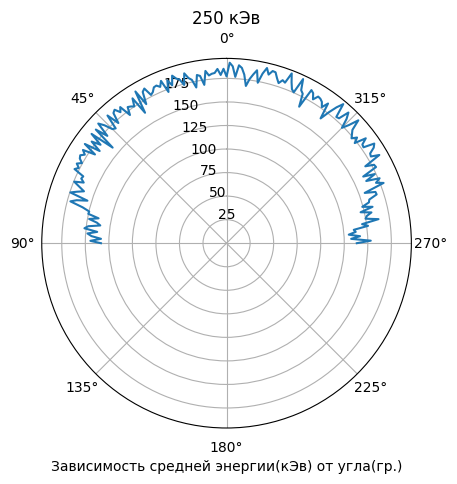

In [18]:
kev250_ang = kev250.copy()
kev250_ang['theta'] = np.round(np.arctan(kev250_ang['y'] / kev250_ang['z']) * 180 / np.pi,  0)
kev250_ang = kev250_ang.drop('x', axis=1)
kev250_ang = kev250_ang.drop('y', axis=1)
kev250_ang = kev250_ang.drop('z', axis=1)
kev250_ang = kev250_ang.drop('trackNum', axis=1)
kev250_ang = kev250_ang.drop('particleName', axis=1)
kev250_ang = kev250_ang.drop('IsFirstStepInVolume', axis=1)
kev250_ang = kev250_ang.groupby(by = 'theta').mean()
kev250_ang = kev250_ang.reset_index()

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.plot(kev250_ang['theta'] * np.pi / 180, kev250_ang['kinEn'])
ax.set_xlabel('Зависимость средней энергии(кЭв) от угла(гр.)')
ax.set_title("250 кЭв")
ax.set_theta_zero_location('W', offset=-90)
plt.show()

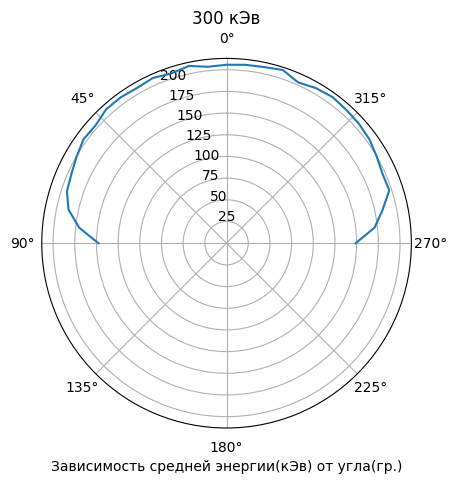

In [19]:
kev300_ang = kev300.copy()
kev300_ang['theta'] = np.round(np.arctan(kev300_ang['y'] / kev300_ang['z']) * 180 / np.pi / 6) * 6
kev300_ang = kev300_ang.drop('x', axis=1)
kev300_ang = kev300_ang.drop('y', axis=1)
kev300_ang = kev300_ang.drop('z', axis=1)
kev300_ang = kev300_ang.drop('trackNum', axis=1)
kev300_ang = kev300_ang.drop('particleName', axis=1)
kev300_ang = kev300_ang.drop('IsFirstStepInVolume', axis=1)
kev300_ang = kev300_ang.groupby(by = 'theta').mean()
kev300_ang = kev300_ang.reset_index()

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.plot(kev300_ang['theta'] * np.pi / 180, kev300_ang['kinEn'])
ax.set_xlabel('Зависимость средней энергии(кЭв) от угла(гр.)')
ax.set_title("300 кЭв")
ax.set_theta_zero_location('W', offset=-90)
plt.show()

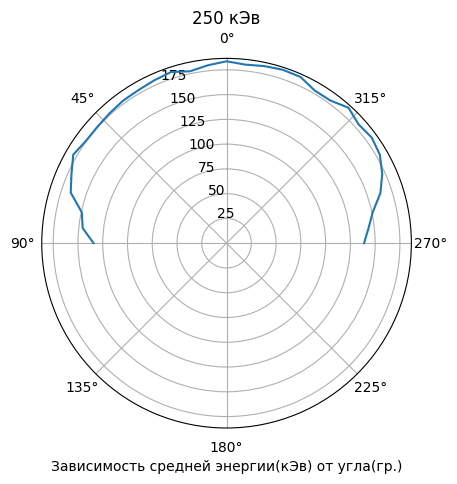

In [20]:
kev250_ang = kev250.copy()
kev250_ang['theta'] = np.round(np.arctan(kev250_ang['y'] / kev250_ang['z']) * 180 / np.pi / 6) * 6
kev250_ang = kev250_ang.drop('x', axis=1)
kev250_ang = kev250_ang.drop('y', axis=1)
kev250_ang = kev250_ang.drop('z', axis=1)
kev250_ang = kev250_ang.drop('trackNum', axis=1)
kev250_ang = kev250_ang.drop('particleName', axis=1)
kev250_ang = kev250_ang.drop('IsFirstStepInVolume', axis=1)
kev250_ang = kev250_ang.groupby(by = 'theta').mean()
kev250_ang = kev250_ang.reset_index()

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.plot(kev250_ang['theta'] * np.pi / 180, kev250_ang['kinEn'])
ax.set_xlabel('Зависимость средней энергии(кЭв) от угла(гр.)')
ax.set_title("250 кЭв")
ax.set_theta_zero_location('W', offset=-90)
plt.show()